## 기본 라이브러리 불러오기

In [304]:
# 라이브러리 임포트
import os
import pandas as pd
import chardet

# 사용자 정의함수 경로 설정
import sys
sys.path.append("G:/내 드라이브/Source/_Custom_Function")
# 사용자 정의함수 불러오기

import time

import ExcelFile_Merge as em
import ExcelFile_Read as er
import ExcelFile_EDA as ee

## 기본 데이터 불러오기

### 서울특별시 공공자전거 대여이력 정보

In [308]:
start_time = time.time()
_columns = ['자전거번호', '대여일자', '대여시간차', '대여대여소번호', '반납대여소번호', '이용시간(분)', '이용거리(M)']
df_BikeRent_2023 = pd.read_parquet('G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\서울특별시 공공자전거 대여이력 정보_2023_preprocessed.parquet', columns = _columns)
print("read_csv time :", time.time() - start_time)

read_csv time : 19.628517150878906


In [309]:
start_time = time.time()
_columns = ['자전거번호', '대여일자', '대여시간차', '대여대여소번호', '반납대여소번호', '이용시간(분)', '이용거리(M)']
df_BikeRent_2024 = pd.read_parquet('G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\서울특별시 공공자전거 대여이력 정보_2024_preprocessed.parquet', columns = _columns)
print("read_csv time :", time.time() - start_time)

read_csv time : 7.943140268325806


### 23년,24년 데이터 합치기

In [313]:
df_BikeRent = pd.concat([df_BikeRent_2023, df_BikeRent_2024], axis=0)

In [315]:
print(f'df_BikeRent_2023.shape[0] : {df_BikeRent_2023.shape[0]}')
print(f'df_BikeRent_2024.shape[0] : {df_BikeRent_2024.shape[0]}')
print(f'df_BikeRent.shape[0] : {df_BikeRent.shape[0]}')

df_BikeRent_2023.shape[0] : 45363848
df_BikeRent_2024.shape[0] : 21621807
df_BikeRent.shape[0] : 66985655


In [317]:
df_BikeRent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66985655 entries, 0 to 22107539
Data columns (total 7 columns):
 #   Column   Dtype          
---  ------   -----          
 0   자전거번호    object         
 1   대여일자     object         
 2   대여시간차    timedelta64[ns]
 3   대여대여소번호  object         
 4   반납대여소번호  object         
 5   이용시간(분)  int64          
 6   이용거리(M)  float64        
dtypes: float64(1), int64(1), object(4), timedelta64[ns](1)
memory usage: 4.0+ GB


In [319]:
df_BikeRent.head(2)

,자전거번호,대여일자,대여시간차,대여대여소번호,반납대여소번호,이용시간(분),이용거리(M)
0,SPB-39194,2023-01-01,0 days 00:00:30,01554,01554,0,0.0
1,SPB-43457,2023-01-01,0 days 00:02:08,01653,04003,2,0.0


---
### df_BikeRent 의 데이터를 조건에 재조회
- 대여시간차가 5분 미만인 데이터
- 대여 대여소 번호와 반납 대여소 번호가 동일한 데이터

In [322]:
# 대여일자를 날짜 형식으로 변환
df_BikeRent['대여일자'] = pd.to_datetime(df_BikeRent['대여일자'])

In [323]:
# 2023.09.01 ~ 2024.06.30
# 이상패턴 횟수 - 조회용
df_BikeRent230901_240630 = df_BikeRent[df_BikeRent['대여일자'].between('2023-09-01', '2024-06-30')]
# 2024.01.01 ~ 2024.06.30
# 정상 자전거번호 확인용
df_BikeRent240101_240630 = df_BikeRent[df_BikeRent['대여일자'].between('2024-01-01', '2024-06-30')]

In [326]:
print(f'df_BikeRent230901_240630.shape[0] : {df_BikeRent230901_240630.shape[0]}')
print(f'df_BikeRent240101_240630.shape[0] : {df_BikeRent240101_240630.shape[0]}')

df_BikeRent230901_240630.shape[0] : 37176899
df_BikeRent240101_240630.shape[0] : 21621807


---
### 서울시 공공자전거 고장신고 내역

In [329]:
start_time = time.time()
df_BikeBroken = pd.read_parquet('G:\\내 드라이브\\DataSet\\_최종 병합 파일\\서울시 공공자전거 고장신고 내역_15-24.06.parquet')
print("read_csv time :", time.time() - start_time)

read_csv time : 0.6526839733123779


In [331]:
df_BikeBroken.head(3)

,자전거번호,고장구분,등록일자,등록시간
0,SPB-00108,체인,2015-12-04,07:41:01
1,SPB-00210,체인,2015-12-07,12:23:33
2,SPB-00035,기타,2015-12-09,17:07:00


In [333]:
df_BikeBroken.shape[0]

767715

---
### 2024년 고장이력만 조회
- 등록일자 : 2024-01-01 ~ 2024-06-30

In [336]:
df_BikeBroken2 = df_BikeBroken[df_BikeBroken['등록일자'].between('2024-01-01', '2024-12-31')]

In [338]:
print(f'df_BikeBroken.shape[0] {df_BikeBroken.shape[0]}')
print(f'df_BikeBroken2.shape[0] {df_BikeBroken2.shape[0]}')

df_BikeBroken.shape[0] 767715
df_BikeBroken2.shape[0] 76463


In [340]:
df_BikeBroken2['자전거번호'].unique()

<StringArray>
['SPB-40704', 'SPB-65171', 'SPB-44316', 'SPB-31539', 'SPB-51998', 'SPB-38568',
 'SPB-68235', 'SPB-44078', 'SPB-66158', 'SPB-45102',
 ...
 'SPB-64200', 'SPB-42922', 'SPB-69655', 'SPB-39650', 'SPB-38653', 'SPB-62989',
 'SPB-31854', 'SPB-62325', 'SPB-62654', 'SPB-35527']
Length: 28589, dtype: string

In [342]:
df_BikeBroken2['자전거번호'].value_counts()

자전거번호
SPB-30296    24
SPB-70298    23
SPB-31172    21
SPB-41406    21
SPB-33626    19
             ..
SPB-60257     1
SPB-40210     1
SPB-59161     1
SPB-32403     1
SPB-35527     1
Name: count, Length: 28589, dtype: Int64

In [344]:
# 2024-01-01 ~ 2024-06-30	
df_BikeBroken2.sort_values(by = '등록일자', ascending = True).head(2)

,자전거번호,고장구분,등록일자,등록시간
691252,SPB-40704,단말기,2024-01-01,03:57:03
691351,SPB-66424,체인,2024-01-01,18:45:08


In [346]:
df_BikeBroken2[df_BikeBroken2['자전거번호'] == 'SPB-30296'].sort_values(by = '등록일자', ascending = False).head(2)

,자전거번호,고장구분,등록일자,등록시간
752797,SPB-30296,기타,2024-06-06,14:51:27
752796,SPB-30296,체인,2024-06-06,14:51:27


---
### 자전거고장신고내역에서
- 자전거번호' 별로 가장마지막 신고내역만 가져오기

In [349]:
# 등록일자를 datetime 형식으로 변환
df_BikeBroken2['등록일자'] = pd.to_datetime(df_BikeBroken2['등록일자'])

# 자전거번호 별로 가장 최근 등록일자를 가진 행 추출
df_BikeBroken_latest = df_BikeBroken2.loc[df_BikeBroken2.groupby('자전거번호')['등록일자'].idxmax()]

# 이전일자 컬럼 생성 (등록일자보다 한 달 전)
df_BikeBroken_latest['이전일자_1mon'] = df_BikeBroken_latest['등록일자'] - pd.DateOffset(months=1)
df_BikeBroken_latest['이전일자_2mon'] = df_BikeBroken_latest['등록일자'] - pd.DateOffset(months=2)
df_BikeBroken_latest['이전일자_3mon'] = df_BikeBroken_latest['등록일자'] - pd.DateOffset(months=3)

C:\Users\user\AppData\Local\Temp\ipykernel_4296\3450085564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BikeBroken2['등록일자'] = pd.to_datetime(df_BikeBroken2['등록일자'])


In [351]:
df_BikeBroken_latest.head(2)

,자전거번호,고장구분,등록일자,등록시간,이전일자_1mon,이전일자_2mon,이전일자_3mon
714016,SPB-30006,페달,2024-03-31,23:48:49,2024-02-29,2024-01-31,2023-12-31
760656,SPB-30010,타이어,2024-06-18,18:37:09,2024-05-18,2024-04-18,2024-03-18


In [353]:
df_BikeBroken_latest = df_BikeBroken_latest[['자전거번호', '고장구분', '이전일자_1mon', '이전일자_2mon', '이전일자_3mon', '등록일자']]

In [355]:
df_BikeBroken_latest.head(2)

,자전거번호,고장구분,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록일자
714016,SPB-30006,페달,2024-02-29,2024-01-31,2023-12-31,2024-03-31
760656,SPB-30010,타이어,2024-05-18,2024-04-18,2024-03-18,2024-06-18


#### 고장난 자전기 가져오기

In [358]:
df_BikeBroken_latest['자전거번호'].unique()

<StringArray>
['SPB-30006', 'SPB-30010', 'SPB-30014', 'SPB-30018', 'SPB-30022', 'SPB-30024',
 'SPB-30026', 'SPB-30031', 'SPB-30036', 'SPB-30037',
 ...
 'SPB-84955', 'SPB-84963', 'SPB-84968', 'SPB-84974', 'SPB-84984', 'SPB-84988',
 'SPB-84989', 'SPB-84993', 'SPB-84995', 'SPB-84996']
Length: 28589, dtype: string

In [360]:
df_BikeBroken_latest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28589 entries, 714016 to 737981
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자전거번호      28589 non-null  string        
 1   고장구분       28589 non-null  string        
 2   이전일자_1mon  28589 non-null  datetime64[ns]
 3   이전일자_2mon  28589 non-null  datetime64[ns]
 4   이전일자_3mon  28589 non-null  datetime64[ns]
 5   등록일자       28589 non-null  datetime64[ns]
dtypes: datetime64[ns](4), string(2)
memory usage: 1.5 MB


In [362]:
# 2024.01.01 ~ 2024.06.30 사이에 있는 자전거 대여이력에서 고장이 아닌 자전거 번호 조회
df_BikeRent2 = df_BikeRent240101_240630[~df_BikeRent240101_240630['자전거번호'].isin(df_BikeBroken_latest['자전거번호'].unique())]

In [364]:
df_BikeRent2['자전거번호'].count()

4855582

In [366]:
df_BikeRent2.head(2)

,자전거번호,대여일자,대여시간차,대여대여소번호,반납대여소번호,이용시간(분),이용거리(M)
8,SPB-80304,2024-01-01,0 days 00:01:55,00214,00213,1,200.00
22,SPB-32497,2024-01-01,0 days 00:05:00,04674,04659,5,982.45


In [368]:
# 등록일자를 datetime 형식으로 변환
df_BikeRent2['대여일자'] = pd.to_datetime(df_BikeRent2['대여일자'])

# 자전거번호 별로 가장 최근 등록일자를 가진 행 추출
df_BikeRent_latest = df_BikeRent2.loc[df_BikeRent2.groupby('자전거번호')['대여일자'].idxmax()]

# 이전일자 컬럼 생성 (등록일자보다 한 달 전)
df_BikeRent_latest['이전일자_1mon'] = df_BikeRent_latest['대여일자'] - pd.DateOffset(months=1)
df_BikeRent_latest['이전일자_2mon'] = df_BikeRent_latest['대여일자'] - pd.DateOffset(months=2)
df_BikeRent_latest['이전일자_3mon'] = df_BikeRent_latest['대여일자'] - pd.DateOffset(months=3)

C:\Users\user\AppData\Local\Temp\ipykernel_4296\2979067368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BikeRent2['대여일자'] = pd.to_datetime(df_BikeRent2['대여일자'])


In [370]:
df_BikeRent_latest.head(2)

,자전거번호,대여일자,대여시간차,대여대여소번호,반납대여소번호,이용시간(분),이용거리(M),이전일자_1mon,이전일자_2mon,이전일자_3mon
21756509,SPB-30001,2024-06-28,0 days 00:01:35,03798,01174,1,0.00,2024-05-28,2024-04-28,2024-03-28
14976293,SPB-30008,2024-05-20,0 days 00:21:21,03920,00785,21,3419.51,2024-04-20,2024-03-20,2024-02-20


In [372]:
df_BikeRent_latest.shape[0]

13307

### 대여이력 <=> 고장내역 - 컬럼이름 맞춰주기

In [375]:
df_BikeBroken_latest.columns

Index(['자전거번호', '고장구분', '이전일자_1mon', '이전일자_2mon', '이전일자_3mon', '등록일자'], dtype='object')

In [377]:
df_BikeRent_latest.columns

Index(['자전거번호', '대여일자', '대여시간차', '대여대여소번호', '반납대여소번호', '이용시간(분)', '이용거리(M)',
       '이전일자_1mon', '이전일자_2mon', '이전일자_3mon'],
      dtype='object')

In [379]:
df_BikeRent_latest['고장구분'] = ''

In [381]:
df_BikeBroken_latest.rename(columns = {'등록일자':'등록대여일자'}, inplace = True)
df_BikeRent_latest.rename(columns = {'대여일자':'등록대여일자'}, inplace = True)

In [383]:
df_BikeBroken_latest = df_BikeBroken_latest[['자전거번호', '고장구분', '이전일자_1mon', '이전일자_2mon', '이전일자_3mon', '등록대여일자']]
df_BikeRent_latest = df_BikeRent_latest[['자전거번호', '고장구분', '이전일자_1mon', '이전일자_2mon', '이전일자_3mon', '등록대여일자']]

In [385]:
df_BikeBroken_latest.head(2)

,자전거번호,고장구분,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자
714016,SPB-30006,페달,2024-02-29,2024-01-31,2023-12-31,2024-03-31
760656,SPB-30010,타이어,2024-05-18,2024-04-18,2024-03-18,2024-06-18


In [387]:
df_BikeRent_latest.head(2)

,자전거번호,고장구분,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자
21756509,SPB-30001,,2024-05-28,2024-04-28,2024-03-28,2024-06-28
14976293,SPB-30008,,2024-04-20,2024-03-20,2024-02-20,2024-05-20


---
### 고장여부 - 컬럼 생성

In [390]:
df_BikeBroken_latest['고장여부'] = 1
df_BikeRent_latest['고장여부'] = 0

In [392]:
df_BikeBroken_latest.head(2)

,자전거번호,고장구분,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장여부
714016,SPB-30006,페달,2024-02-29,2024-01-31,2023-12-31,2024-03-31,1
760656,SPB-30010,타이어,2024-05-18,2024-04-18,2024-03-18,2024-06-18,1


In [394]:
df_BikeRent_latest.head(2)

,자전거번호,고장구분,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장여부
21756509,SPB-30001,,2024-05-28,2024-04-28,2024-03-28,2024-06-28,0
14976293,SPB-30008,,2024-04-20,2024-03-20,2024-02-20,2024-05-20,0


In [396]:
print(f'df_BikeBroken_latest.shape[0] : {df_BikeBroken_latest.shape[0]}')
print(f'df_BikeRent_latest.shape[0] : {df_BikeRent_latest.shape[0]}')

df_BikeBroken_latest.shape[0] : 28589
df_BikeRent_latest.shape[0] : 13307


---
### 자전거(고장) - 자전거(일반) 합치기

In [399]:
df_Bike_latest = pd.concat([df_BikeBroken_latest, df_BikeRent_latest], axis=0)

In [401]:
print(f'df_BikeBroken_latest.shape[0] : {df_BikeBroken_latest.shape[0]}')
print(f'df_BikeRent_latest.shape[0] : {df_BikeRent_latest.shape[0]}')
print(f'df_Bike_latest.shape[0] : {df_Bike_latest.shape[0]}')

df_BikeBroken_latest.shape[0] : 28589
df_BikeRent_latest.shape[0] : 13307
df_Bike_latest.shape[0] : 41896


In [403]:
df_Bike_latest.head(2)

,자전거번호,고장구분,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장여부
714016,SPB-30006,페달,2024-02-29,2024-01-31,2023-12-31,2024-03-31,1
760656,SPB-30010,타이어,2024-05-18,2024-04-18,2024-03-18,2024-06-18,1


In [405]:
df_Bike_latest['고장여부'].value_counts()

고장여부
1    28589
0    13307
Name: count, dtype: int64

In [407]:
df_BikeRent230901_240630.head()

,자전거번호,대여일자,대여시간차,대여대여소번호,반납대여소번호,이용시간(분),이용거리(M)
30476802,SPB-45718,2023-09-01,0 days 00:00:13,02213,02213,0,0.0
30476803,SPB-63096,2023-09-01,0 days 00:00:29,00838,00838,0,0.0
30476804,SPB-49019,2023-09-01,0 days 00:01:35,00431,04798,1,230.0
30476805,SPB-53749,2023-09-01,0 days 00:00:03,03819,03819,0,0.0
30476806,SPB-82988,2023-09-01,0 days 00:01:08,00389,00473,1,160.0


In [409]:
print(f'df_Bike_latest.shape[0] : {df_Bike_latest.shape[0]}')

# print(f'df_BikeRent230901_240630_5min.shape[0] : {df_BikeRent230901_240630_5min.shape[0]}')
# print(f'df_BikeRent230901_240630_7min.shape[0] : {df_BikeRent230901_240630_7min.shape[0]}')
# print(f'df_BikeRent230901_240630_10min.shape[0] : {df_BikeRent230901_240630_10min.shape[0]}')

print(f'df_BikeRent230901_240630.shape[0] : {df_BikeRent230901_240630.shape[0]}')
print(f'df_Bike_latest.shape[0] : {df_Bike_latest.shape[0]}')
print(f'df_Bike_latest.shape[0] : {df_Bike_latest.shape[0]}')

df_Bike_latest.shape[0] : 41896
df_BikeRent230901_240630.shape[0] : 37176899
df_Bike_latest.shape[0] : 41896
df_Bike_latest.shape[0] : 41896


In [411]:
df_Bike_latest.head()

,자전거번호,고장구분,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장여부
714016,SPB-30006,페달,2024-02-29,2024-01-31,2023-12-31,2024-03-31,1
760656,SPB-30010,타이어,2024-05-18,2024-04-18,2024-03-18,2024-06-18,1
763779,SPB-30014,기타,2024-05-24,2024-04-24,2024-03-24,2024-06-24,1
749636,SPB-30018,기타,2024-05-01,2024-04-01,2024-03-01,2024-06-01,1
741124,SPB-30022,기타,2024-04-20,2024-03-20,2024-02-20,2024-05-20,1


In [413]:
df_BikeRent230901_240630['자전거번호'].isin(df_Bike_latest['자전거번호']).shape[0]

37176899

In [415]:
df_BikeRent230901_240630_temp = df_BikeRent230901_240630

In [417]:
df_BikeRent230901_240630 = df_BikeRent230901_240630.groupby(['자전거번호', '대여일자']).agg({
    '이용거리(M)': ['sum'],             # 이용거리의 합계
    '이용시간(분)': ['sum'],            # 이용시간의 합계
    '대여일자': ['count']               # 이용횟수
    }).reset_index()

In [419]:
df_BikeRent230901_240630.shape[0]

6928434

In [421]:
df_BikeRent230901_240630.columns = ['자전거번호', '대여일자', '이용거리(M)', '이용시간(분)', '대여횟수']

In [423]:
df_BikeRent230901_240630.head()

,자전거번호,대여일자,이용거리(M),이용시간(분),대여횟수
0,SPB-30001,2023-09-01,42995.90,366,12
1,SPB-30001,2023-09-02,3255.36,17,2
2,SPB-30001,2023-09-03,2298.96,11,1
3,SPB-30001,2023-09-04,2463.08,16,2
4,SPB-30001,2023-09-05,5845.93,69,2


In [425]:
df_BikeRent230901_240630.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6928434 entries, 0 to 6928433
Data columns (total 5 columns):
 #   Column   Dtype         
---  ------   -----         
 0   자전거번호    object        
 1   대여일자     datetime64[ns]
 2   이용거리(M)  float64       
 3   이용시간(분)  int64         
 4   대여횟수     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 264.3+ MB


In [454]:
df_BikeRent230901_240630 = df_BikeRent230901_240630[df_BikeRent230901_240630['대여일자'] >= df_Bike_latest['이전일자_3mon'].min()]

In [456]:
df_BikeRent230901_240630.shape[0]

6193200

---
### 대여이력의 이상패턴 횟수 구하기
- '자전거고장신고내역'의 '이전일자' ~ '등록대여일자'가 '자전거대여이력'의 이상패턴의 '대여일자'에 포함되는 자전거별 횟수 가져오기

In [458]:
start_time = time.time()

# 결과를 저장할 딕셔너리 초기화
results = []

# # 1. 조건에 따라 필터링: 대여시간차가 (5분, 7분, 10분) 미만, 대여 대여소 번호와 반납 대여소 번호가 동일한 데이터만 선택
cond1_5 = df_BikeRent230901_240630_temp['대여시간차'] < pd.Timedelta(minutes=5)
cond1_7 = df_BikeRent230901_240630_temp['대여시간차'] < pd.Timedelta(minutes=7)
cond1_10 = df_BikeRent230901_240630_temp['대여시간차'] < pd.Timedelta(minutes=10)
cond2 = df_BikeRent230901_240630_temp['대여대여소번호'] == df_BikeRent230901_240630_temp['반납대여소번호']
df_BikeRent230901_240630_5min = df_BikeRent230901_240630_temp[cond1_5 & cond2].copy()
df_BikeRent230901_240630_7min = df_BikeRent230901_240630_temp[cond1_7 & cond2].copy()
df_BikeRent230901_240630_10min = df_BikeRent230901_240630_temp[cond1_10 & cond2].copy()

# 고장 신고 내역을 순회하며 대여 이력에서 해당 기간에 속하는 대여 건수를 카운트
cnt_Bike_latest = len(df_Bike_latest)
cnt = 1
# for index, row in df_Bike_latest.iterrows():
for index, row in df_Bike_latest.head(10).iterrows():
    bike_number = row['자전거번호']
    previous_date_1mon = row['이전일자_1mon']
    previous_date_2mon = row['이전일자_2mon']
    previous_date_3mon = row['이전일자_3mon']
    registered_date = row['등록대여일자']

    # =========================================
    # 이전 한달의, 이상패턴 횟수 조회 (5분, 7분, 10분)
    # 자전거 번호가 일치하고, 대여일자가 이전일자와 등록대여일자 사이에 있는 경우의 수를 카운트
    outlier_rent_5min_count = df_BikeRent230901_240630_5min[(df_BikeRent230901_240630_5min['자전거번호'] == bike_number) & 
                               (df_BikeRent230901_240630_5min['대여일자'] >= previous_date_1mon) & 
                               (df_BikeRent230901_240630_5min['대여일자'] <= registered_date)].shape[0]
    
    outlier_rent_7min_count = df_BikeRent230901_240630_7min[(df_BikeRent230901_240630_7min['자전거번호'] == bike_number) & 
                               (df_BikeRent230901_240630_7min['대여일자'] >= previous_date_1mon) & 
                               (df_BikeRent230901_240630_7min['대여일자'] <= registered_date)].shape[0]
    
    outlier_rent_10min_count = df_BikeRent230901_240630_10min[(df_BikeRent230901_240630_10min['자전거번호'] == bike_number) & 
                               (df_BikeRent230901_240630_10min['대여일자'] >= previous_date_1mon) & 
                               (df_BikeRent230901_240630_10min['대여일자'] <= registered_date)].shape[0]
    # =========================================
    
    # =========================================
    df_temp = df_BikeRent230901_240630[(df_BikeRent230901_240630['자전거번호'] == bike_number) & 
                               (df_BikeRent230901_240630['대여일자'] <= registered_date)]
    
    # 이동거리,이동시간 합계 (1달 전, 2달 전, 3달 전)
    move_sum_1mon = df_temp[(df_temp['대여일자'] >= previous_date_1mon)].groupby('자전거번호').agg({
    '이용거리(M)': ['sum'],             # 이용거리의 합계
    '이용시간(분)': ['sum'],            # 이용시간의 합계
    '대여횟수': ['count']               # 이용횟수
    })
    if not move_sum_1mon.empty:
        before_1mon_distance = move_sum_1mon['이용거리(M)'].values[0][0]
        before_1mon_time = move_sum_1mon['이용시간(분)'].values[0][0]
        before_1mon_cnt = move_sum_1mon['대여횟수'].values[0][0]
    else:
        before_1mon_distance = None
        before_1mon_time = None
        before_1mon_cnt = None

    move_sum_2mon = df_temp[(df_temp['대여일자'] >= previous_date_2mon)].groupby('자전거번호').agg({
    '이용거리(M)': ['sum'],             # 이용거리의 합계
    '이용시간(분)': ['sum'],            # 이용시간의 합계
    '대여횟수': ['count']               # 이용횟수
    })
    if not move_sum_2mon.empty:
        before_2mon_distance = move_sum_2mon['이용거리(M)'].values[0][0]
        before_2mon_time = move_sum_2mon['이용시간(분)'].values[0][0]
        before_2mon_cnt = move_sum_2mon['대여횟수'].values[0][0]
    else:
        before_2mon_distance = None
        before_2mon_time = None
        before_2mon_cnt = None

    move_sum_3mon = df_temp[(df_temp['대여일자'] >= previous_date_3mon)].groupby('자전거번호').agg({
    '이용거리(M)': ['sum'],             # 이용거리의 합계
    '이용시간(분)': ['sum'],            # 이용시간의 합계
    '대여횟수': ['count']               # 이용횟수
    })
    if not move_sum_3mon.empty:
        before_3mon_distance = move_sum_3mon['이용거리(M)'].values[0][0]
        before_3mon_time = move_sum_3mon['이용시간(분)'].values[0][0]
        before_3mon_cnt = move_sum_3mon['대여횟수'].values[0][0]
    else:
        before_3mon_distance = None
        before_3mon_time = None
        before_3mon_cnt = None
                                                                                                               
    results.append({
            '자전거번호': bike_number,
            '이전일자_1mon': previous_date_1mon,
            '이전일자_2mon': previous_date_2mon,
            '이전일자_3mon': previous_date_3mon,
            '등록대여일자': registered_date,
            '고장구분': row['고장구분'],
            '고장여부': row['고장여부'],
        
            '이상패턴_5min_횟수': outlier_rent_5min_count,
            '이상패턴_7min_횟수': outlier_rent_7min_count,
            '이상패턴_10min_횟수': outlier_rent_10min_count,
            
            '이전일자_1mon_이용거리': before_1mon_distance,
            '이전일자_1mon_이용시간': before_1mon_time,
            '이전일자_1mon_이용횟수': before_1mon_cnt,
            '이전일자_2mon_이용거리': before_2mon_distance,
            '이전일자_2mon_이용시간': before_2mon_time,
            '이전일자_2mon_이용횟수': before_2mon_cnt,
            '이전일자_3mon_이용거리': before_3mon_distance,
            '이전일자_3mon_이용시간': before_3mon_time,
            '이전일자_3mon_이용횟수': before_3mon_cnt,
        })

    # 처리 상황 디버깅
    print(f'{str(cnt)}/{str(cnt_Bike_latest)} - {bike_number}')
    cnt = cnt + 1
    
# DataFrame으로 변환
df_bike_results = pd.DataFrame(results)

print("check time :", time.time() - start_time)

df_bike_results.to_parquet('G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\서울특별시 공공자전거 대여이력 정보_(PRE)고장예측_2023_2024.parquet', index=False)

1/41896 - SPB-30006
2/41896 - SPB-30010
3/41896 - SPB-30014
4/41896 - SPB-30018
5/41896 - SPB-30022
6/41896 - SPB-30024
7/41896 - SPB-30026
8/41896 - SPB-30031
9/41896 - SPB-30036
10/41896 - SPB-30037
check time : 9.537295818328857


In [460]:
df_bike_results.head(3)

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수
0,SPB-30006,2024-02-29,2024-01-31,2023-12-31,2024-03-31,페달,1,2,2,2,98170.92,843,22,168996.89,1623,34,223726.14,2395,46
1,SPB-30010,2024-05-18,2024-04-18,2024-03-18,2024-06-18,타이어,1,5,5,5,231653.56,2257,25,401421.89,3921,46,586710.32,5621,65
2,SPB-30014,2024-05-24,2024-04-24,2024-03-24,2024-06-24,기타,1,7,8,9,335138.54,2966,26,563483.08,5358,49,679100.64,6344,66


check time : 84.03840374946594

In [440]:
start_time = time.time()
df_123 = pd.read_parquet('G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\서울특별시 공공자전거 대여이력 정보_(PRE)고장예측_2023_2024.parquet')
print("read_csv time :", time.time() - start_time)
df_123.head()

read_csv time : 0.027301311492919922


,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수
0,SPB-30006,2024-02-29,2024-01-31,2023-12-31,2024-03-31,페달,1,2,2,2,98170.92,843,22,168996.89,1623,34,223726.14,2395,46
1,SPB-30010,2024-05-18,2024-04-18,2024-03-18,2024-06-18,타이어,1,5,5,5,231653.56,2257,25,401421.89,3921,46,586710.32,5621,65
2,SPB-30014,2024-05-24,2024-04-24,2024-03-24,2024-06-24,기타,1,7,8,9,335138.54,2966,26,563483.08,5358,49,679100.64,6344,66
3,SPB-30018,2024-05-01,2024-04-01,2024-03-01,2024-06-01,기타,1,2,2,2,291259.65,3041,23,547061.02,5131,44,664487.39,6357,66
4,SPB-30022,2024-04-20,2024-03-20,2024-02-20,2024-05-20,기타,1,7,7,7,253399.66,2755,28,428688.47,4720,51,526113.69,5605,64


---
## 가공 파일 저장

In [ ]:
df_bike_results.to_parquet('G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\서울특별시 공공자전거 대여이력 정보_(PRE)고장예측_2023_2024.parquet', index=False)

---
## 고장횟수 별 - 고장비율
 - 고장 : 24년의 마지막고장신고
 - 정상 : 24년의 마지막 대여일

### [전체] 고장여부 비율

In [127]:
counts = df_Bike_latest_2['고장여부'].value_counts()
total = counts.sum()   # 총 데이터 개수
percentage = counts / total * 100   # 비율 계산
print(f'total : {total}')
print(f'counts : {counts}')
print(f'percentage : {percentage}')

total : 41710
counts : 고장여부
1    28589
0    13121
Name: count, dtype: int64
percentage : 고장여부
1    68.542316
0    31.457684
Name: count, dtype: float64


In [225]:
df_Bike_latest_2['이상패턴_횟수'].value_counts().sort_index()[:50]

이상패턴_횟수
0     1918
1     4440
2     5868
3     5911
4     5195
5     4155
6     3217
7     2316
8     1666
9     1270
10    1016
11     708
12     580
13     451
14     399
15     325
16     277
17     253
18     204
19     167
20     159
21     128
22     107
23     106
24      90
25      75
26      62
27      64
28      56
29      45
30      55
31      37
32      49
33      31
34      22
35      26
36      30
37      22
38      20
39      11
40      17
41      16
42      19
43      12
44       9
45       6
46       6
47       4
48       6
49       6
Name: count, dtype: int64

In [129]:
# 고장횟수에 따른 고장여부 비율 계산
df_2 = df_Bike_latest_2.groupby('이상패턴_횟수')['고장여부'].value_counts(normalize=True).unstack().reset_index()
df_2.head(20)

고장여부,이상패턴_횟수,0,1
0,0,NaN,1.000000
1,1,0.243514,0.756486
2,2,0.294862,0.705138
3,3,0.343478,0.656522
4,4,0.345997,0.654003
5,5,0.383106,0.616894
6,6,0.394855,0.605145
7,7,0.394296,0.605704
8,8,0.377865,0.622135
9,9,0.373016,0.626984


In [131]:
df_2.columns = ['이상패턴_횟수', '고장', '정상']
df_2.head()

,이상패턴_횟수,고장,정상
0,0,NaN,1.000000
1,1,0.243514,0.756486
2,2,0.294862,0.705138
3,3,0.343478,0.656522
4,4,0.345997,0.654003


In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows에서는 'Malgun Gothic' 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

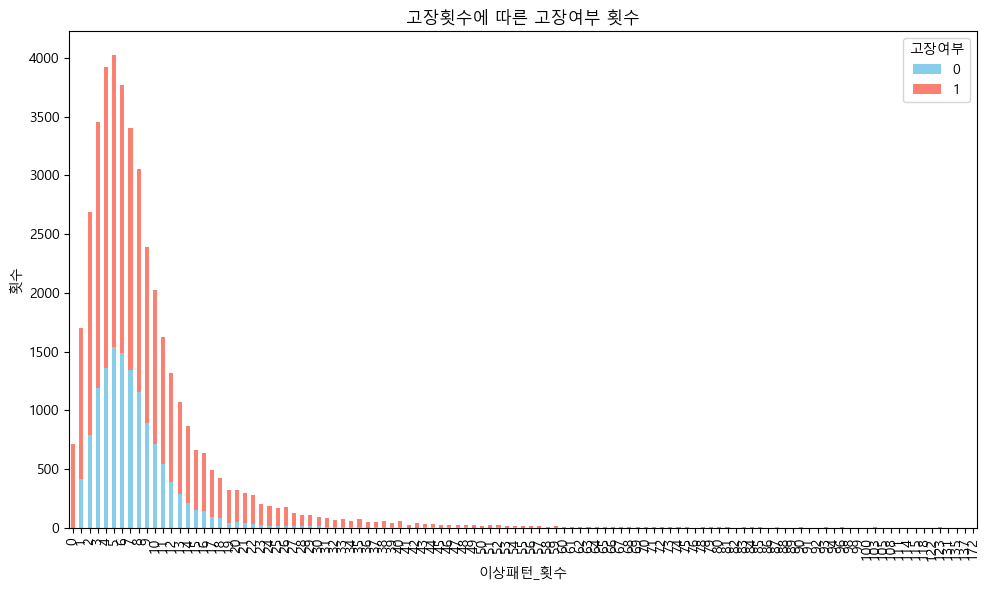

In [135]:
# 결과 시각화
result = df_Bike_latest_2.groupby('이상패턴_횟수')['고장여부'].value_counts().unstack().fillna(0)
result.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('이상패턴_횟수')
plt.ylabel('횟수')
plt.title('이상패턴_횟수에 따른 고장여부 횟수')
plt.legend(title='고장여부')
plt.tight_layout()
plt.show()

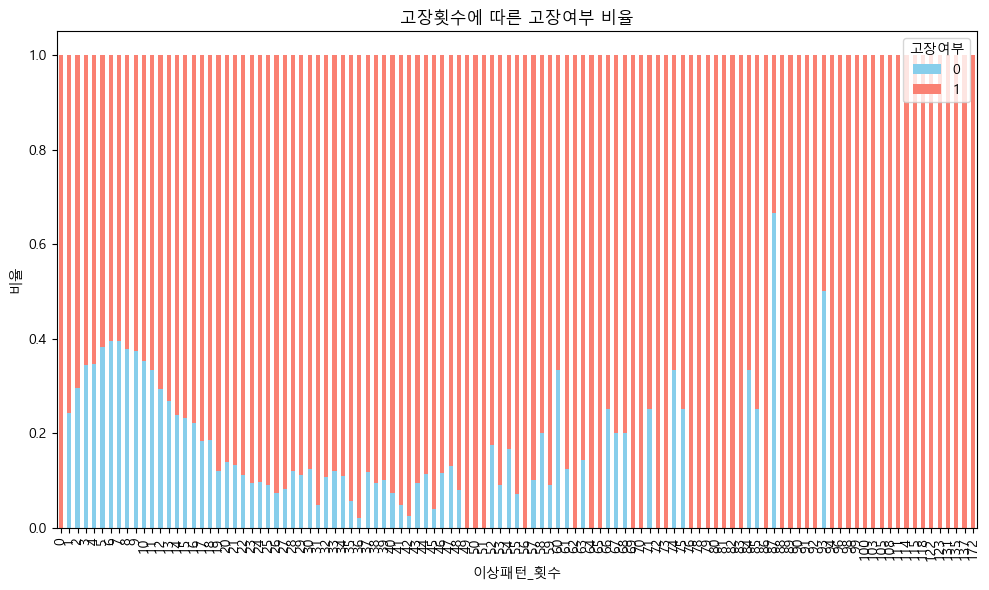

In [137]:
# 결과 시각화
result = df_Bike_latest_2.groupby('이상패턴_횟수')['고장여부'].value_counts(normalize=True).unstack().fillna(0)
#result = df_Bike_latest_2.groupby('이상패턴_횟수')['고장여부'].value_counts().unstack().fillna(0)
result.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('이상패턴_횟수')
plt.ylabel('비율')
plt.title('이상패턴_횟수에 따른 고장여부 비율')
plt.legend(title='고장여부')
plt.tight_layout()
plt.show()

---
## 선형회귀 모델링

In [142]:
import numpy as np

In [144]:
np.array([2, 5, 7, 2, 7]).reshape(-1, 1)

array([[2],
       [5],
       [7],
       [2],
       [7]])

In [146]:
df_Bike_latest_2.head(3)

,자전거번호,이전일자,등록대여일자,고장구분,고장여부,이상패턴_횟수
0,SPB-30006,2024-01-31,2024-03-31,페달,1,3
1,SPB-30010,2024-04-18,2024-06-18,타이어,1,7
2,SPB-30014,2024-04-24,2024-06-24,기타,1,9


In [148]:
np.array(df_Bike_latest_2['이상패턴_횟수']).reshape(-1, 1)

array([[3],
       [7],
       [9],
       ...,
       [8],
       [3],
       [3]], dtype=int64)

In [150]:
np.array(df_Bike_latest_2['고장여부'])

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

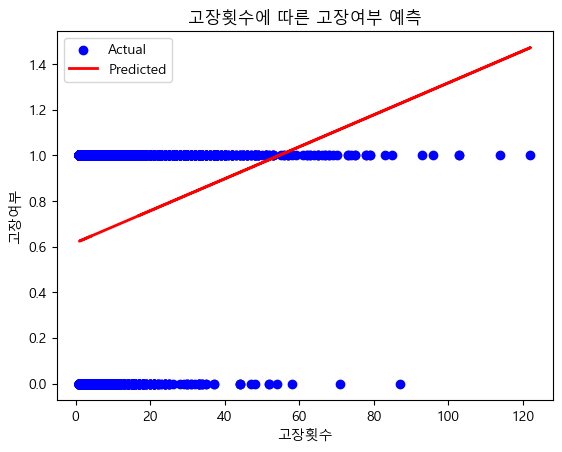

회귀 계수: [0.00700518]
절편: 0.6176931151046378


In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# # 예시 데이터 생성
# # 독립 변수 (예: 고장횟수)
# X = np.array([2, 5, 7, 2, 7]).reshape(-1, 1)
# # 종속 변수 (예: 고장여부)
# y = np.array([1, 1, 1, 1, 1])

df_Bike_latest_3 = df_Bike_latest_2[df_Bike_latest_2['이상패턴_횟수'] > 0]
X = np.array(df_Bike_latest_3['이상패턴_횟수']).reshape(-1, 1)
y = np.array(df_Bike_latest_3['고장여부'])

# 데이터셋을 학습 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)

# 결과 시각화
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('고장횟수')
plt.ylabel('고장여부')
plt.title('고장횟수에 따른 고장여부 예측')
plt.legend()
plt.show()

# 회귀 계수 출력
print('회귀 계수:', model.coef_)
print('절편:', model.intercept_)

---
## 로지스틱회귀 모델링

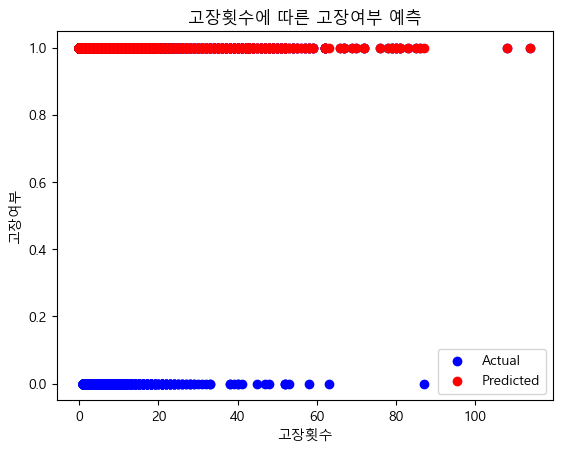

테스트 세트 정확도: 0.6854471349796212


In [154]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# # 예시 데이터 생성
# X = np.array([2, 5, 7, 2, 7]).reshape(-1, 1)  # 고장횟수
# y = np.array([1, 1, 1, 0, 0])  # 고장여부

df_Bike_latest_3 = df_Bike_latest_2[df_Bike_latest_2['이상패턴_횟수'] > 0]
df_Bike_latest_3 = df_Bike_latest_2
X = np.array(df_Bike_latest_3['이상패턴_횟수']).reshape(-1, 1)
y = np.array(df_Bike_latest_3['고장여부'])

# 데이터셋을 학습 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=444, stratify=y)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 결과 시각화
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('고장횟수')
plt.ylabel('고장여부')
plt.title('고장횟수에 따른 고장여부 예측')
plt.legend()
plt.show()

# 모델 평가
print('테스트 세트 정확도:', model.score(X_test, y_test))

### [ 이상패턴 횟수 == 0 ] 것들의 고장여부 비율

In [158]:
counts = df_Bike_latest_2[df_Bike_latest_2['이상패턴_횟수'] == 0]['고장여부'].value_counts()
total = counts.sum()   # 총 데이터 개수
percentage = counts / total * 100   # 비율 계산
print(f'total : {total}')
print(f'counts : {counts}')
print(f'percentage : {percentage}')

total : 710
counts : 고장여부
1    710
Name: count, dtype: int64
percentage : 고장여부
1    100.0
Name: count, dtype: float64


### [ 이상패턴 횟수 > 0 ] 것들의 고장여부 비율

In [160]:
counts = df_Bike_latest_2[df_Bike_latest_2['이상패턴_횟수'] > 0]['고장여부'].value_counts()
total = counts.sum()   # 총 데이터 개수
percentage = counts / total * 100   # 비율 계산
print(f'total : {total}')
print(f'counts : {counts}')
print(f'percentage : {percentage}')

total : 41000
counts : 고장여부
1    27879
0    13121
Name: count, dtype: int64
percentage : 고장여부
1    67.997561
0    32.002439
Name: count, dtype: float64
